In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

train_df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
columns_to_drop = ["trans_num", "merchant", "job", "Unnamed: 0"]

for col in columns_to_drop:
    if col in train_df.columns:
        train_df = train_df.drop(col, axis=1)

    if col in test_df.columns:
        test_df = test_df.drop(col, axis=1)


In [6]:
categorical = ['category', 'gender']

train_df = pd.get_dummies(train_df, columns=categorical, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical, drop_first=True)


In [7]:
X_train = train_df.drop("is_fraud", axis=1)
y_train = train_df["is_fraud"]

X_test = test_df.drop("is_fraud", axis=1)
y_test = test_df["is_fraud"]


In [11]:
# Force all values to numeric, convert errors to NaN
X_train_df = X_train_df.apply(pd.to_numeric, errors='coerce')
X_test_df = X_test_df.apply(pd.to_numeric, errors='coerce')

# Replace infinities (if any)
X_train_df = X_train_df.replace([np.inf, -np.inf], np.nan)
X_test_df = X_test_df.replace([np.inf, -np.inf], np.nan)

# Fill missing values with column medians (from train set)
median_values = X_train_df.median()
X_train_df = X_train_df.fillna(median_values)
X_test_df = X_test_df.fillna(median_values)

# Align columns
X_train_df, X_test_df = X_train_df.align(X_test_df, join="left", axis=1, fill_value=0)

# SCALE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

print("FINAL SHAPES: ", X_train.shape, X_test.shape)
print("Scaling successful.")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


FINAL SHAPES:  (1296675, 30) (555719, 30)
Scaling successful.


In [13]:
# Convert arrays back to DataFrame
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# 1. Fill any remaining NaN with 0
X_train_df = X_train_df.fillna(0)
X_test_df = X_test_df.fillna(0)

# 2. Convert back to numpy
X_train = X_train_df.values
X_test = X_test_df.values

# Double check
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())



NaN in X_train: 0
NaN in X_test: 0


In [14]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
print("Model training completed.")


Model training completed.


In [15]:
y_pred = model.predict(X_test)
print("Prediction completed.")


Prediction completed.


In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9955984949227937

Confusion Matrix:
 [[553273    301]
 [  2145      0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



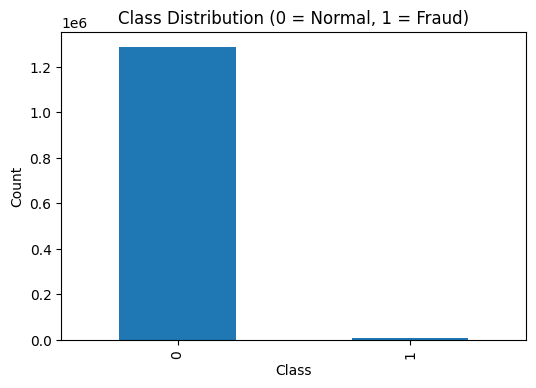

In [19]:
import matplotlib.pyplot as plt

# Assign the correct DataFrame
df_plot = train_df # Using train_df for demonstration, you can choose test_df if preferred.

plt.figure(figsize=(6,4))
df_plot['is_fraud'].value_counts().plot(kind='bar')
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

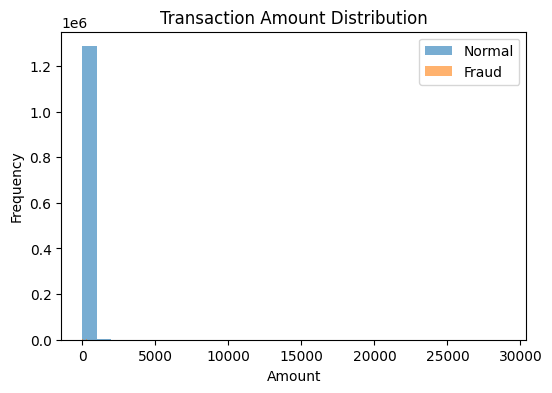

In [21]:
import matplotlib.pyplot as plt

# Using train_df as the base for plotting, as it's defined
plt.figure(figsize=(6,4))
plt.hist(train_df[train_df['is_fraud']==0]['amt'], bins=30, alpha=0.6, label='Normal')
plt.hist(train_df[train_df['is_fraud']==1]['amt'], bins=30, alpha=0.6, label='Fraud')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

is_fraud                 1.000000
amt                      0.219404
category_shopping_net    0.044261
category_grocery_pos     0.035558
category_misc_net        0.025886
gender_M                 0.007642
category_shopping_pos    0.005955
city_pop                 0.002136
lat                      0.001894
merch_lat                0.001741
Name: is_fraud, dtype: float64


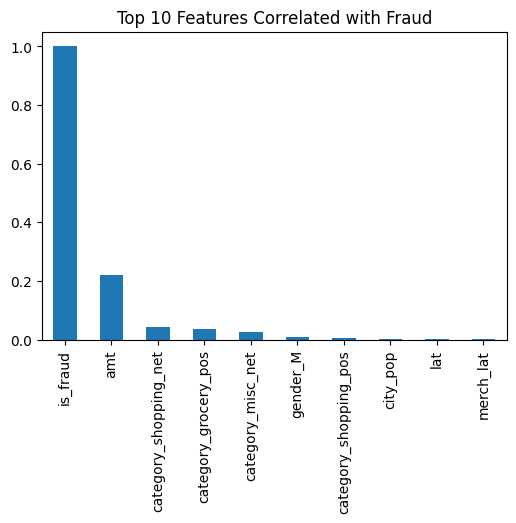

In [25]:
import matplotlib.pyplot as plt

correlation = train_df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)
print(correlation.head(10))
correlation.head(10).plot(kind='bar', figsize=(6,4))
plt.title("Top 10 Features Correlated with Fraud")
plt.show()

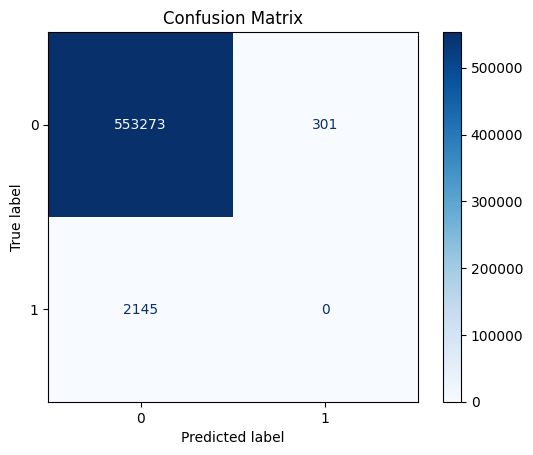

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


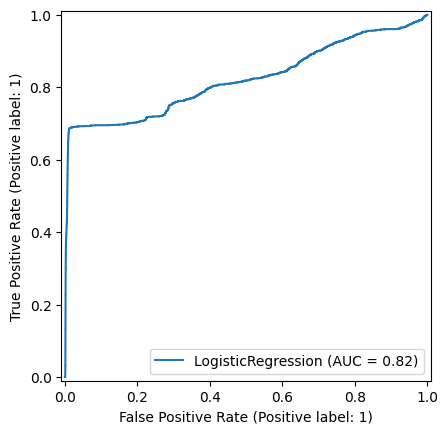

In [27]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()
